In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA

In [24]:
df1=pd.read_csv(r"C:\Mba notes\novels\AirPassengers.csv")

In [25]:
df1["Month"]=pd.to_datetime(df1["Month"],infer_datetime_format=True)
df1

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [26]:
indexedDataset=df1.set_index(["Month"])
indexedDataset

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


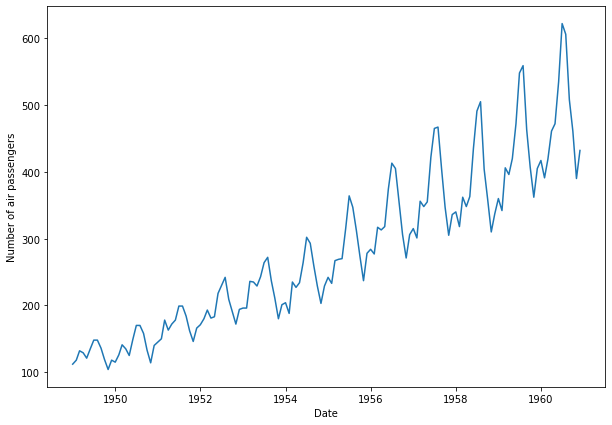

In [27]:
plt.figure(figsize=(10,7))
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(indexedDataset)

As mean is not constant data is not stationary

In [30]:
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


Rolling Stats Technique

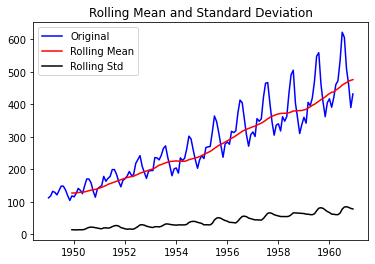

In [31]:
orig=plt.plot(indexedDataset,color="blue",label="Original")
mean=plt.plot(rolmean,color="red",label="Rolling Mean")
std=plt.plot(rolstd,color="black",label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

Dickey-Fuller test

In [35]:
dftest=adfuller(indexedDataset["#Passengers"],autolag="AIC")
dfoutput=pd.Series(dftest[0:4],index=["Test Statistic","p-value","Lags Used","Number of Observation Used"])
for key,value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key]=value
print(dfoutput)

Test Statistic                  0.815369
p-value                         0.991880
Lags Used                      13.000000
Number of Observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


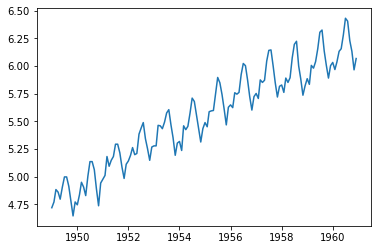

In [36]:
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

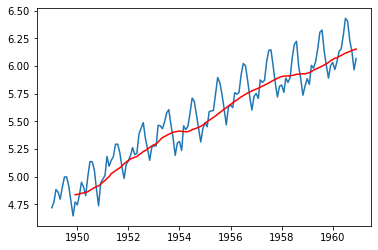

In [39]:
movingAverage=indexedDataset_logScale.rolling(window=12).mean()
movingSTD=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color="red")

# <font color="b">ACF and PACF </font>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
register_matplotlib_converters()

In [29]:
df1=pd.read_csv(r"C:\Mba notes\novels\ice.csv")
df1.head()

,DATE,Icecream
0,1/1/1972,59.9622
1,2/1/1972,67.0605
2,3/1/1972,74.2350
3,4/1/1972,78.1120
4,5/1/1972,84.7636


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      577 non-null    object 
 1   Icecream  577 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.1+ KB


In [31]:
df1["DATE"]=pd.to_datetime(df1["DATE"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      577 non-null    datetime64[ns]
 1   Icecream  577 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.1 KB


In [48]:
d=pd.to_datetime("2011-01-01")
df1=df1.set_index(df1["DATE"])
df2=df1.drop("DATE",1)
df2

<ipython-input-48-753988c4c235>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2=df1.drop("DATE",1)


,Icecream
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


In [49]:
df3=df2[d:]
df3.head()

,Icecream
DATE,
2011-01-01,92.6110
2011-02-01,106.1656
2011-03-01,114.2484
2011-04-01,116.6234
2011-05-01,116.1365


Text(0.5, 0, 'Title')

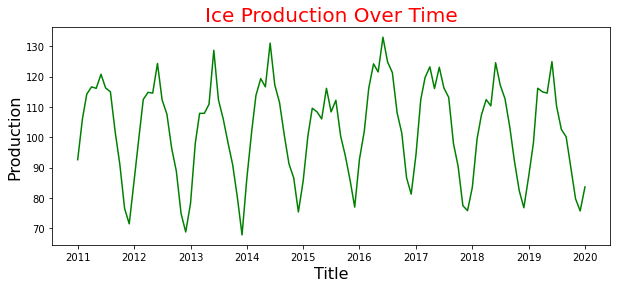

In [50]:
plt.figure(figsize=(10,4))
plt.plot(df3.Icecream,color="green")
plt.title("Ice Production Over Time",fontsize=20,color="red")
plt.ylabel("Production",fontsize=16)
plt.xlabel("Title",fontsize=16)

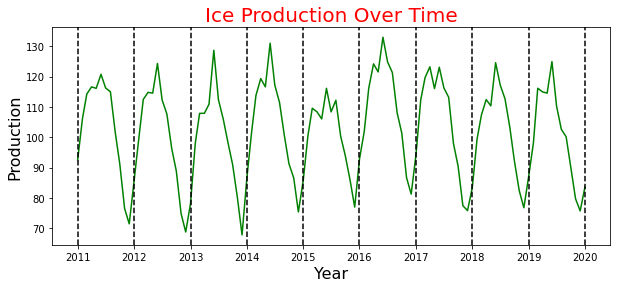

In [51]:
plt.figure(figsize=(10,4))
plt.plot(df3.Icecream,color="green")
plt.title("Ice Production Over Time",fontsize=20,color="red")
plt.ylabel("Production",fontsize=16)
plt.xlabel("Year",fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"),color="k",linestyle="--")

### <font color="red">ACF</font>

<Figure size 1080x720 with 0 Axes>

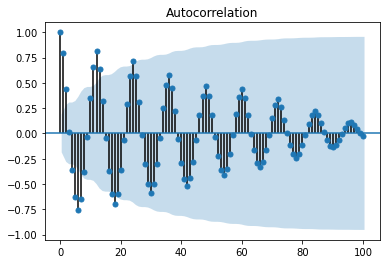

In [55]:
plt.figure(figsize=(15,10))
acf_plot=plot_acf(df3.Icecream,lags=100)

Based on decaying ACF,we are likely dealing with an Auto Regressive process

C:\Mba notes\novels\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


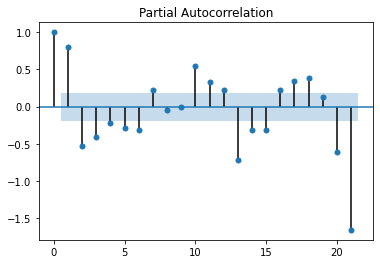

In [58]:
pacf_plot=plot_pacf(df3.Icecream)

Based on PACF, we should start with an Auto Regressive model with lags 1,2,3,10,13

### On stock data

In [83]:
import yfinance as yf
import pandas_datareader as web
tickerSymbol="SPY"
tickerData=yf.Ticker(tickerSymbol)
df1=tickerData.history(peroid="1d",start='2015-1-1',end='2020-1-1')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [269]:
df=pd.read_csv(r"C:\Mba notes\novels\HistoricalQuotes.csv")
df.tail()

,Date,Close/Last,Volume,Open,High,Low
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771
2517,03/01/2010,$29.8557,137312041,$29.3928,$29.9286,$29.35


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [271]:
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values(by="Date",ascending=True)
df

,Date,Close/Last,Volume,Open,High,Low
2517,2010-03-01,$29.8557,137312041,$29.3928,$29.9286,$29.35
2516,2010-03-02,$29.8357,141486282,$29.99,$30.1186,$29.6771
2515,2010-03-03,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2514,2010-03-04,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2513,2010-03-05,$31.2786,224647427,$30.7057,$31.3857,$30.6614
...,...,...,...,...,...,...
4,2020-02-24,$298.18,55548830,$297.26,$304.18,$289.23
3,2020-02-25,$288.08,57668360,$300.95,$302.53,$286.13
2,2020-02-26,$292.65,49678430,$286.53,$297.88,$286.5
1,2020-02-27,$273.52,80151380,$281.1,$286,$272.96


In [272]:
d=pd.to_datetime("2015-01-01")
e=pd.to_datetime("2016-02-28")
df=df.set_index("Date")
df

,Close/Last,Volume,Open,High,Low
Date,,,,,
2010-03-01,$29.8557,137312041,$29.3928,$29.9286,$29.35
2010-03-02,$29.8357,141486282,$29.99,$30.1186,$29.6771
2010-03-03,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2010-03-04,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2010-03-05,$31.2786,224647427,$30.7057,$31.3857,$30.6614
...,...,...,...,...,...
2020-02-24,$298.18,55548830,$297.26,$304.18,$289.23
2020-02-25,$288.08,57668360,$300.95,$302.53,$286.13
2020-02-26,$292.65,49678430,$286.53,$297.88,$286.5


In [277]:
df1=df.copy()

In [278]:
def replace_dollar(text):
    txt=text.replace("$","")
    return txt

In [280]:
df1[" Close/Last"]=df1[" Close/Last"].apply(replace_dollar)
df1

,Close/Last,Volume,Open,High,Low
Date,,,,,
2010-03-01,29.8557,137312041,$29.3928,$29.9286,$29.35
2010-03-02,29.8357,141486282,$29.99,$30.1186,$29.6771
2010-03-03,29.9043,92846488,$29.8486,$29.9814,$29.7057
2010-03-04,30.1014,89591907,$29.8971,$30.1314,$29.8043
2010-03-05,31.2786,224647427,$30.7057,$31.3857,$30.6614
...,...,...,...,...,...
2020-02-24,298.18,55548830,$297.26,$304.18,$289.23
2020-02-25,288.08,57668360,$300.95,$302.53,$286.13
2020-02-26,292.65,49678430,$286.53,$297.88,$286.5


In [281]:
df1.rename(columns={" Close/Last":"Close"},inplace=True)

In [282]:
df1["Close"]=df1["Close"].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-03-01 to 2020-02-28
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Close    2518 non-null   float64
 1    Volume  2518 non-null   int64  
 2    Open    2518 non-null   object 
 3    High    2518 non-null   object 
 4    Low     2518 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 118.0+ KB


In [283]:
df2=pd.DataFrame(df1["Close"])
df2.head()

,Close
Date,
2010-03-01,29.8557
2010-03-02,29.8357
2010-03-03,29.9043
2010-03-04,30.1014
2010-03-05,31.2786


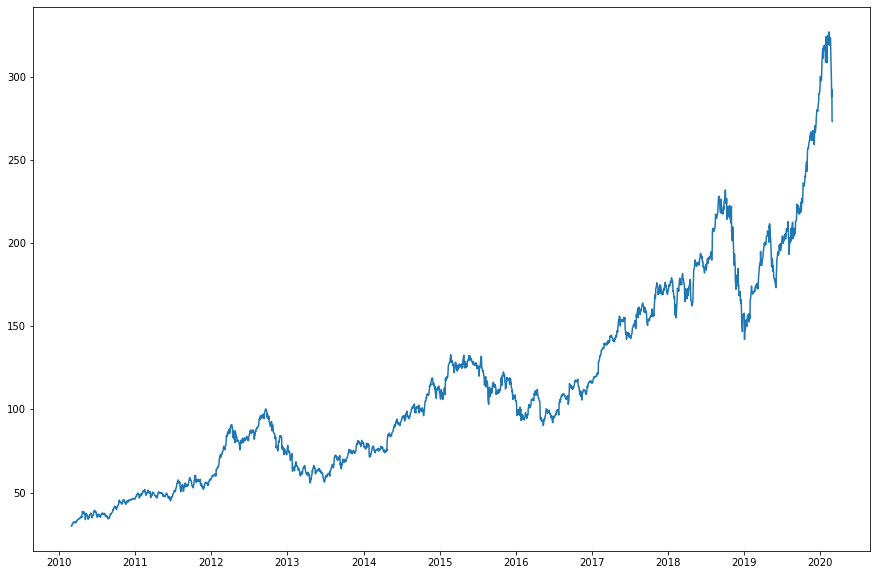

In [285]:
plt.figure(figsize=(15,10))
plt.plot(df2["Close"])

<font color="red">Stationary : take first difference of this series<font>

In [291]:
first_diffs=df2.Close.values[1:]-df2.Close.values[:-1]
first_diffs=np.concatenate([first_diffs,[0]])
df2["First_Difference"]=first_diffs
df2.head()

,Close,1st_Difference,First_Difference
Date,,,
2010-03-01,29.8557,-0.0200,-0.0200
2010-03-02,29.8357,0.0686,0.0686
2010-03-03,29.9043,0.1971,0.1971
2010-03-04,30.1014,1.1772,1.1772
2010-03-05,31.2786,0.0185,0.0185


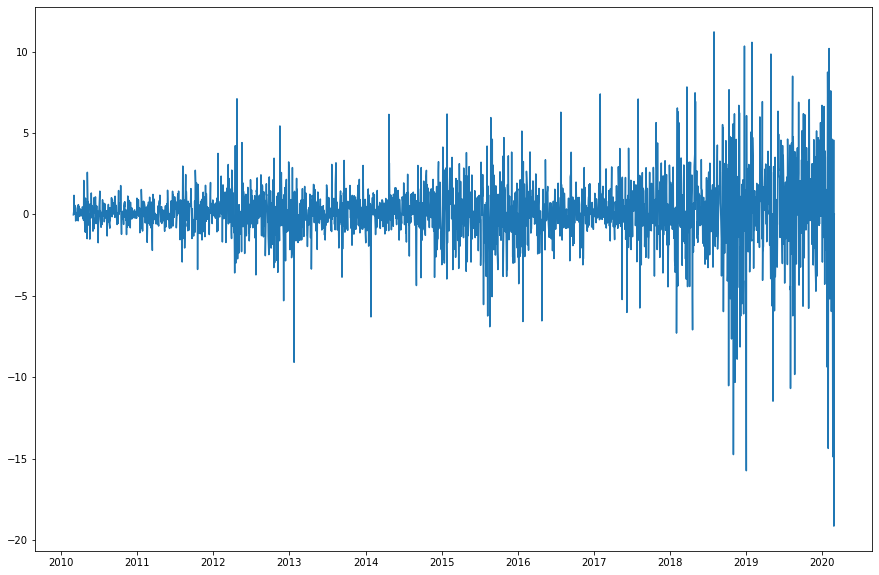

In [293]:
plt.figure(figsize=(15,10))
plt.plot(df2.First_Difference)

In [302]:
df2.shape

(2518, 3)

In [319]:
second_difference=first_diffs[1:]-first_diffs[:-1]
second_difference=np.insert(second_difference,0,first_diffs[0])
df2['second_difference']=second_difference
df2.head()

,Close,1st_Difference,First_Difference,second_difference
Date,,,,
2010-03-01,29.8557,-0.0200,-0.0200,-0.0200
2010-03-02,29.8357,0.0686,0.0686,0.0886
2010-03-03,29.9043,0.1971,0.1971,0.1285
2010-03-04,30.1014,1.1772,1.1772,0.9801
2010-03-05,31.2786,0.0185,0.0185,-1.1587


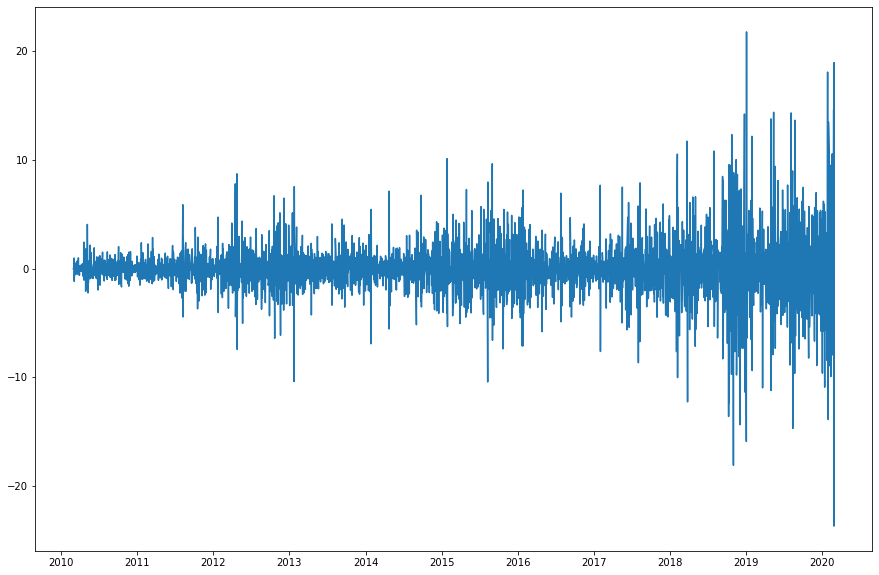

In [321]:
plt.figure(figsize=(15,10))
plt.plot(df2.second_difference)

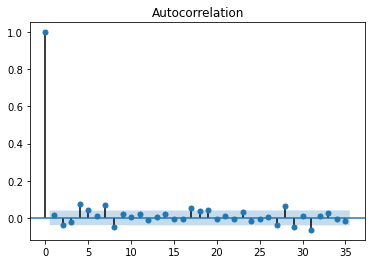

In [322]:
ACF=plot_acf(df2.First_Difference)

ACF is not much informative

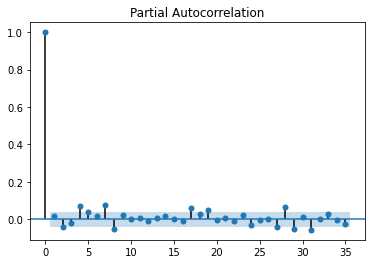

In [324]:
PACF=plot_pacf(df2.First_Difference)

PACF is also not much informative

# <font color="red"> Autoregressive Model </font>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA

In [3]:
df1=pd.read_csv(r"C:\Mba notes\novels\ice.csv")
df1.head()

,DATE,Icecream
0,1/1/1972,59.9622
1,2/1/1972,67.0605
2,3/1/1972,74.2350
3,4/1/1972,78.1120
4,5/1/1972,84.7636


In [12]:
df1["DATE"]=pd.to_datetime(df1["DATE"])
df1=df1.set_index(df1["DATE"])
df1.drop("DATE",1,inplace=True)
df1.head()

<ipython-input-12-d2c9e16aa2dc>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1.drop("DATE",1,inplace=True)


,Icecream
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [28]:

df2=df1.asfreq(pd.infer_freq(df1.index))
df3=df2[pd.to_datetime("2011-01-01"):]

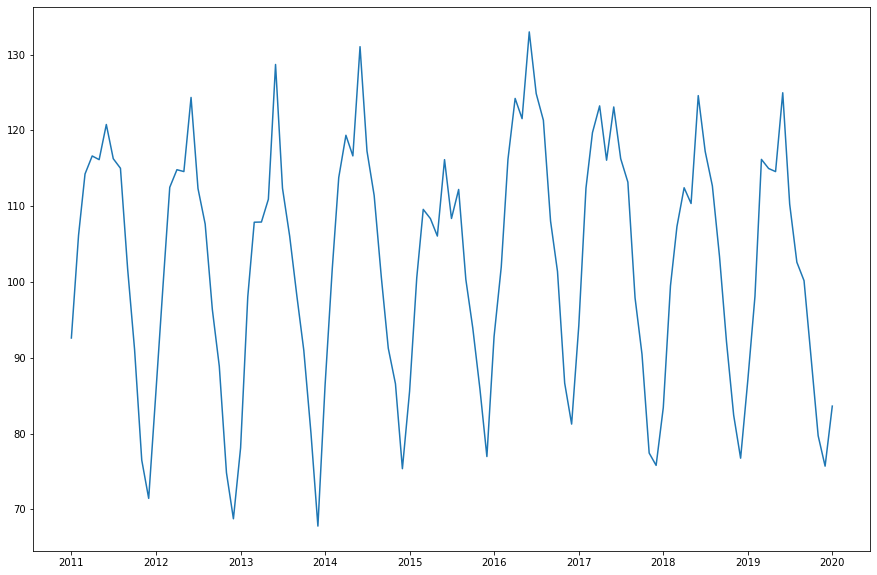

In [29]:
plt.figure(figsize=(15,10))
plt.plot(df3["Icecream"])

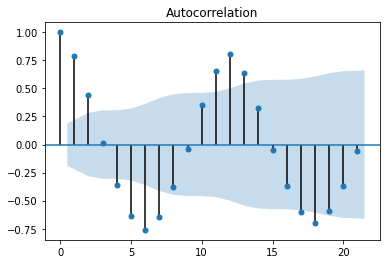

In [32]:
acf=plot_acf(df3["Icecream"])

C:\Mba notes\novels\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


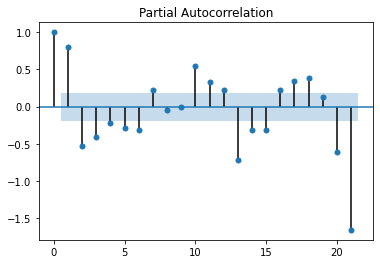

In [34]:
pacf=plot_pacf(df3["Icecream"])

In [42]:
train_end=pd.to_datetime("2018,12,1")
test_end=pd.to_datetime("2019,12,1")
train_data=df3[:train_end]
test_data=df3[train_end + timedelta(days=1):test_end]

In [59]:
model=ARMA(train_data,order=(10,0))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               Icecream   No. Observations:                   85
Model:                    ARMA(10, 0)   Log Likelihood                -262.890
Method:                       css-mle   S.D. of innovations              5.085
Date:                Sat, 23 Oct 2021   AIC                            549.780
Time:                        16:20:25   BIC                            579.092
Sample:                    01-01-2011   HQIC                           561.570
                         - 01-01-2018                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             103.0240      1.628     63.279      0.000      99.833     106.215
ar.L1.Icecream      0.9159      0.086     10.692      0.000       0.748       1.084
ar.L2.Icecream     -0.0660      0.114     -0.577      0.564      -0.290       0.158
ar.L3.Icecream     -0.5916      0.118     -5.011      0.000      -0.823      -0.360
ar.L4.Icecream      0.5039      0.117      4.301      0.000       0.274       0.734
ar.L5.Icecream     -0.0139      0.099     -0.140      0.888      -0.208       0.180
ar.L6.Icecream     -0.6293      0.104     -6.053      0.000      -0.833      -0.425
ar.L7.Icecream      0.5450      0.114      4.765      0.000       0.321       0.769
ar.L8.Icecream     -0.0208      0.115     -0.181      0.857      -0.247       0.205
ar.L9.Icecream     -0.5419      0.118     -4.602      0.000      -0.773      -0.311
ar.L10.Icecream     0.5794      0.086      6.706      0.000       0.410       0.749
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0987           -0.0000j            1.0987           -0.5000
AR.2            -0.8846           -0.5570j            1.0453           -0.4106
AR.3            -0.8846           +0.5570j            1.0453            0.4106
AR.4            -0.0426           -1.0516j            1.0525           -0.2564
AR.5            -0.0426           +1.0516j            1.0525            0.2564
AR.6             0.5177           -0.9428j            1.0755           -0.1701
AR.7             0.5177           +0.9428j            1.0755            0.1701
AR.8             0.8747           -0.5016j            1.0083           -0.0829
AR.9             0.8747           +0.5016j            1.0083            0.0829
AR.10            1.1034           -0.0000j            1.1034           -0.0000
------------------------------------------------------------------------------
"""

In [79]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
predictions=model_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=np.array(test_data.Icecream - predictions)

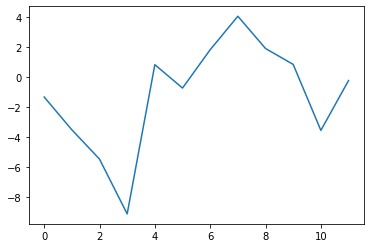

In [82]:
plt.plot(residuals)

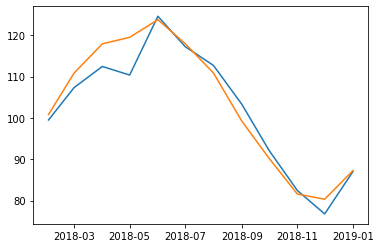

In [87]:
plt.plot(test_data.Icecream)
plt.plot(predictions)


In [88]:
print("Root mean square error : ",np.sqrt(np.mean(residuals**2)))

Root mean square error :  3.7149452370021137


In [90]:
a=[]
b=[1,2,3,4]
a.append(b)
a

[[1, 2, 3, 4]]

In [91]:
a=[]
b=[1,2,3,4]
a.extend(b)
a

[1, 2, 3, 4]

### Evaluating Time-Series Model

# Moving Average

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime,timedelta
register_matplotlib_converters()

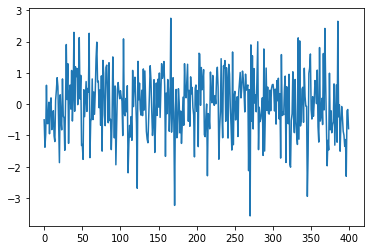

In [3]:
errors=np.random.normal(0,1,400)
plt.plot(errors)

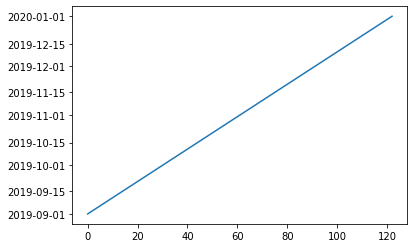

In [4]:
date_index=pd.date_range(start='9/1/2019',end='1/1/2020')
plt.plot(date_index)

In [7]:
mu=50
series=[]
for t in range(1,len(date_index)+1):
    series.append(mu+0.4*errors[t-1]+ 0.3*errors[t-2]+errors[t])

In [12]:
series=pd.Series(series,date_index)
series1=series.asfreq(pd.infer_freq(series.index))

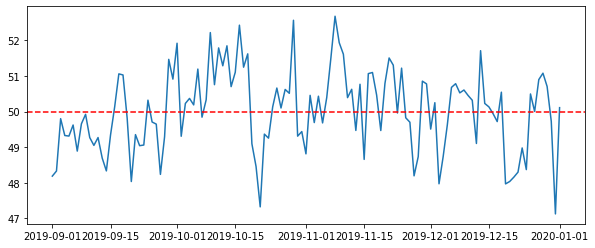

In [13]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu,linestyle="--",color='red')

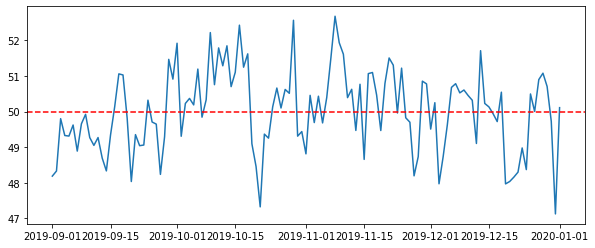

In [14]:
plt.figure(figsize=(10,4))
plt.plot(series1)
plt.axhline(mu,linestyle="--",color='red')

In [15]:
def calc_corr(series,lag):
    return pearson(series[:-lag],series[lag:])[0]

ACF

<BarContainer object of 10 artists>

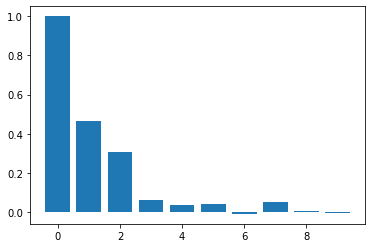

In [17]:
acf_vals=acf(series1)
num_lags=10
plt.bar(range(num_lags),acf_vals[:num_lags])

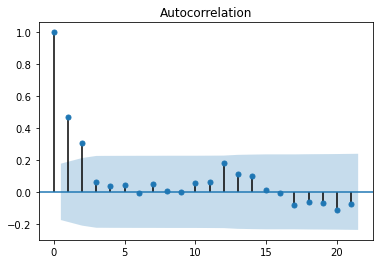

In [18]:
acf=plot_acf(series1)

<BarContainer object of 25 artists>

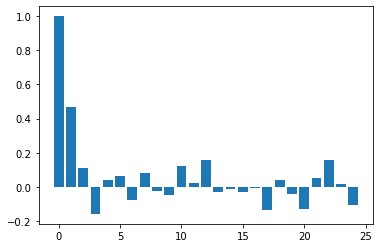

In [19]:
pacf_vals=pacf(series)
num_lags=25
plt.bar(range(num_lags),pacf_vals[:num_lags])

In [23]:
train_end=datetime(2019,12,30)
test_end=datetime(2020,1,1)
train_data=series[:train_end]
test_data=series[train_end + timedelta(days=1):test_end]

<font color="red">Fit ARIMA MODEL</font>

In [24]:
model=ARIMA(train_data,order=(0,0,2))
model_fit=model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  121
Model:                     ARMA(0, 2)   Log Likelihood                -165.312
Method:                       css-mle   S.D. of innovations              0.947
Date:                Mon, 25 Oct 2021   AIC                            338.624
Time:                        11:53:18   BIC                            349.807
Sample:                    09-01-2019   HQIC                           343.165
                         - 12-30-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0229      0.159    313.920      0.000      49.711      50.335
ma.L1.y        0.4644      0.086      5.376      0.000       0.295       0.634
ma.L2.y        0.3968      0.081      4.900      0.0

In [30]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [31]:
predictions=model_fit.predict(start=pred_start_date,end=pred_end_date)

In [32]:
residuals=test_data-predictions

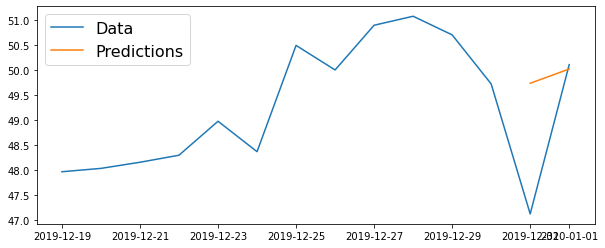

In [35]:
plt.figure(figsize=(10,4))
plt.plot(series1[-14:])
plt.plot(predictions)
plt.legend(("Data","Predictions"),fontsize=16)

In [36]:
print("Mean Absolute Percent Error :", round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error : 0.0286


In [37]:
print("Root Mean Squared Error : ",np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error :  1.8511731431768237


### Granger Casuality

In [5]:
from statsmodels.tsa.stattools import grangercausalitytests 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
t1=[0.1*np.random.normal()]
for i in range(100):
    t1.append(0.5*t1[-1] + 0.1*np.random.normal())

In [17]:
t2=[item + 0.1*np.random.normal() for item in t1]

In [18]:
t1=t1[3:]
t2=t2[:-3]

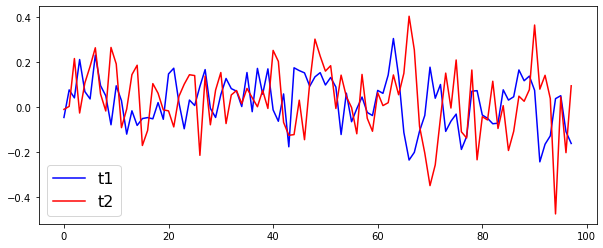

In [19]:
plt.figure(figsize=(10,4))
plt.plot(t1,color='b')
plt.plot(t2,color='r')
plt.legend(['t1','t2'],fontsize=16)

In [20]:
ts_df=pd.DataFrame(columns=['t2','t1'],data=zip(t2,t1))
ts_df

,t2,t1
0,-0.009010,-0.044991
1,0.004112,0.077482
2,0.216711,0.042019
3,-0.025226,0.212309
4,0.108268,0.069926
...,...,...
93,0.039145,-0.126695
94,-0.473447,0.038551
95,0.045532,0.051736
96,-0.201397,-0.108097


In [21]:
gc_res=grangercausalitytests(ts_df,3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1762  , p=0.2809  , df_denom=94, df_num=1
ssr based chi2 test:   chi2=1.2137  , p=0.2706  , df=1
likelihood ratio test: chi2=1.2062  , p=0.2721  , df=1
parameter F test:         F=1.1762  , p=0.2809  , df_denom=94, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.9535  , p=0.0091  , df_denom=91, df_num=2
ssr based chi2 test:   chi2=10.4514 , p=0.0054  , df=2
likelihood ratio test: chi2=9.9207  , p=0.0070  , df=2
parameter F test:         F=4.9535  , p=0.0091  , df_denom=91, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=46.4872 , p=0.0000  , df_denom=88, df_num=3
ssr based chi2 test:   chi2=150.5552, p=0.0000  , df=3
likelihood ratio test: chi2=90.2163 , p=0.0000  , df=3
parameter F test:         F=46.4872 , p=0.0000  , df_denom=88, df_num=3


### Time series Preprocessing

In [45]:
df1=pd.read_csv("Downloads/ice_cream_interest.csv")
df1['month']=pd.to_datetime(df1['month'])

In [46]:
df2=df1.set_index("month")
df2.head()

,interest
month,
2004-01-01,13
2004-02-01,15
2004-03-01,17
2004-04-01,19
2004-05-01,22


In [47]:
heater_series=df2.interest
heater_series

month
2004-01-01    13
2004-02-01    15
2004-03-01    17
2004-04-01    19
2004-05-01    22
              ..
2020-04-01    55
2020-05-01    71
2020-06-01    81
2020-07-01    90
2020-08-01    76
Name: interest, Length: 200, dtype: int64

Text(0, 0.5, 'Search Frequency for Heater')

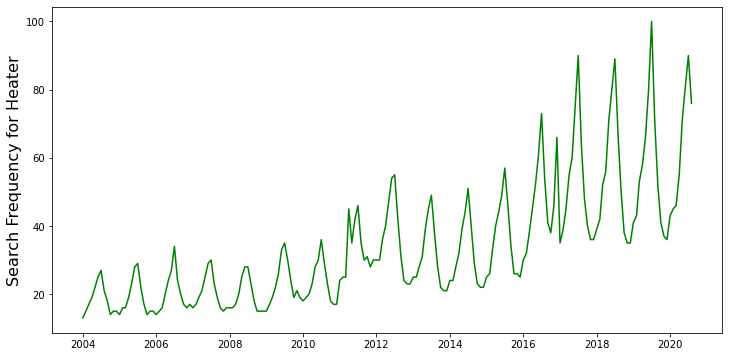

In [48]:
plt.figure(figsize=(12,6))
plt.plot(heater_series,color='green')
plt.ylabel('Search Frequency for Heater',fontsize=16)

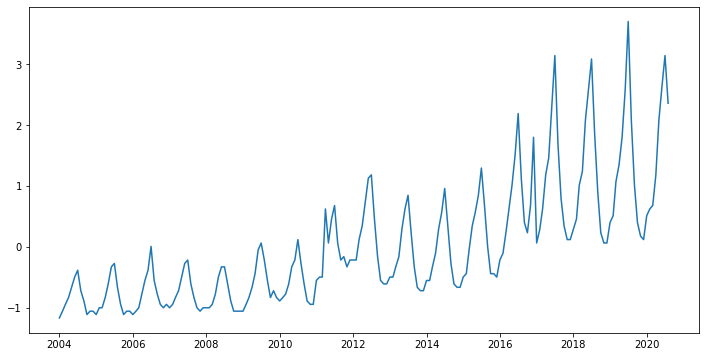

In [49]:
# Normalizing the data
avg , dev= heater_series.mean(),heater_series.std()
heater_series=(heater_series - avg)/dev
plt.figure(figsize=(12,6))
plt.plot(heater_series)

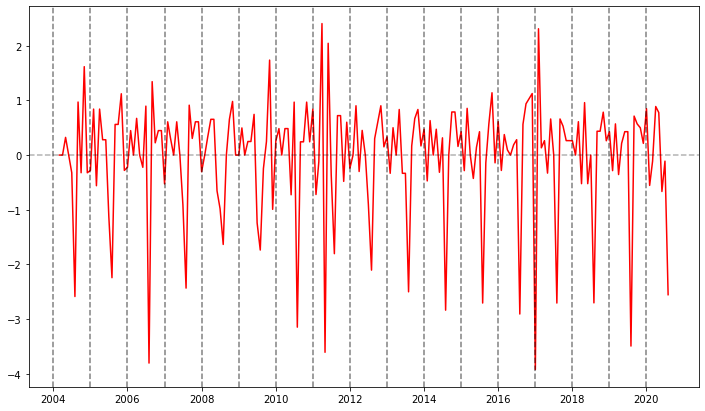

In [56]:
# taking 1st difference to remove stationarity
heater_series=heater_series.diff().dropna()
def plot(data):
    plt.figure(figsize=(12,7))
    plt.plot(data,color='red')
    
    for year in range(2004,2021):
        plt.axvline(datetime(year,1,1),linestyle='--',color='k',alpha=0.5)
plot(heater_series)
plt.axhline(0,linestyle='--',color='k',alpha=0.3)

In [51]:
heater_series

month
2004-02-01    0.112061
2004-03-01    0.112061
2004-04-01    0.112061
2004-05-01    0.168092
2004-06-01    0.168092
                ...   
2020-04-01    0.504275
2020-05-01    0.896488
2020-06-01    0.560305
2020-07-01    0.504275
2020-08-01   -0.784427
Name: interest, Length: 199, dtype: float64

In [52]:
# Remove Increasing Volatility
annual_volatility=heater_series.groupby(heater_series.index.year).std()
annual_volatility

month
2004    0.173275
2005    0.199891
2006    0.250386
2007    0.184225
2008    0.171384
2009    0.225814
2010    0.231431
2011    0.466012
2012    0.372782
2013    0.336042
2014    0.355541
2015    0.393394
2016    0.597506
2017    0.848905
2018    0.642614
2019    0.786047
2020    0.504719
Name: interest, dtype: float64

In [53]:
heater_annual_vol=heater_series.index.map(lambda d: annual_volatility.loc[d.year])
heater_annual_vol

Float64Index([0.17327506296849748, 0.17327506296849748, 0.17327506296849748,
              0.17327506296849748, 0.17327506296849748, 0.17327506296849748,
              0.17327506296849748, 0.17327506296849748, 0.17327506296849748,
              0.17327506296849748,
              ...
               0.7860474938338019,  0.7860474938338019,  0.5047190371081248,
               0.5047190371081248,  0.5047190371081248,  0.5047190371081248,
               0.5047190371081248,  0.5047190371081248,  0.5047190371081248,
               0.5047190371081248],
             dtype='float64', name='month', length=199)

In [54]:
heater_series=heater_series/heater_annual_vol

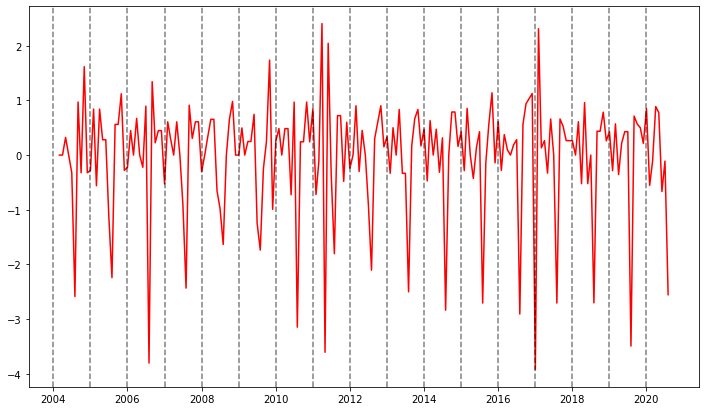

In [57]:
plot(heater_series)

In [58]:
# Remove Seasonality
month_avgs=heater_series.groupby(heater_series.index.month).mean()
month_avgs

month
1    -0.063746
2     0.140832
3     0.259640
4     0.315815
5     0.114190
6     0.061443
7    -0.174732
8    -2.582314
9     0.449845
10    0.483030
11    0.827571
12    0.156241
dtype: float64

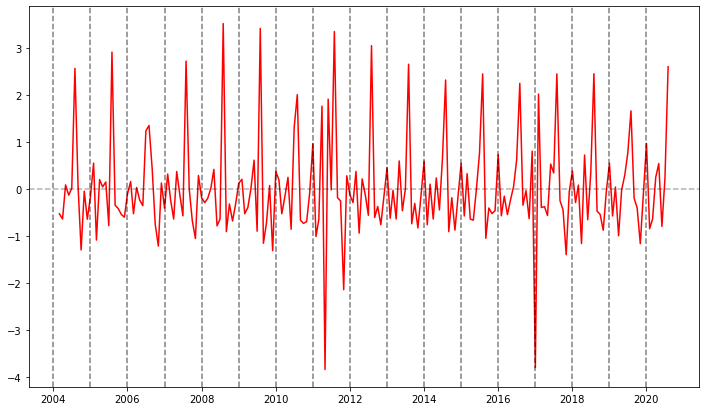

In [61]:
heater_month_avg=heater_series.index.map(lambda d: month_avgs.loc[d.month])
heater_series=heater_series - heater_month_avg
plot(heater_series)
plt.axhline(0,linestyle='--',color='k',alpha=0.3)

### Full Time- Series

In [8]:
df=pd.read_csv(r"downloads/original_series.csv")
df.index=np.arange(1,len(df)+1)
df

,0
1,956.438486
2,7284.907174
3,11357.870166
4,13622.652007
5,17137.455304
...,...
68,42204.338905
69,42368.641039
70,42564.988401
71,42606.297399


In [10]:
def perform_adf_test(series):
    result=adfuller(series)
    print('ADF Statistic : %f' %result[0])
    print('p-value: %f ' % result[1])

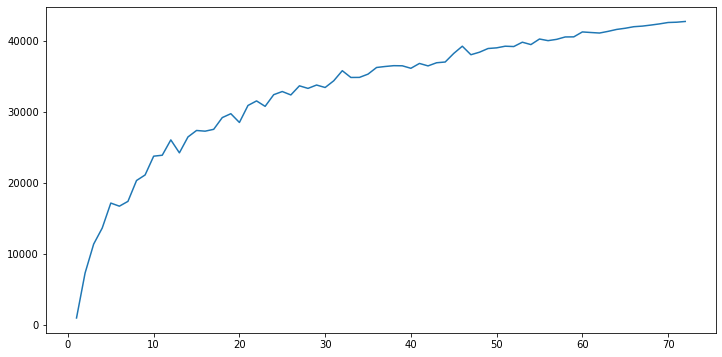

In [17]:
def plot(data):
    plt.figure(figsize=(12,6))
    plt.plot(data)
plot(df)

Game Plan

1.Normalize

2.Exponentiate

3.First Difference

In [16]:
# Normalize
mu=np.mean(df).iloc[0]
sigma=np.std(df).iloc[0]
norm_ts=(df-mu)/sigma

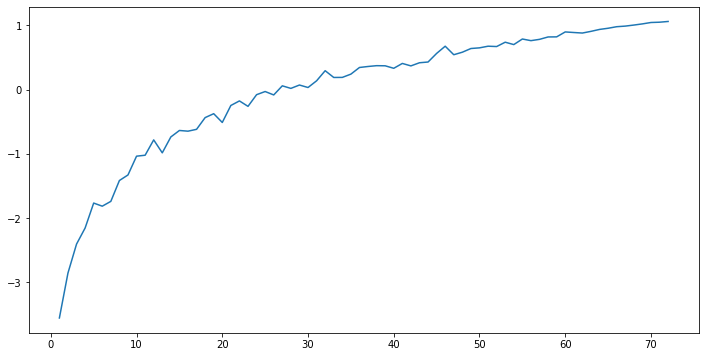

In [18]:
plot(norm_ts)

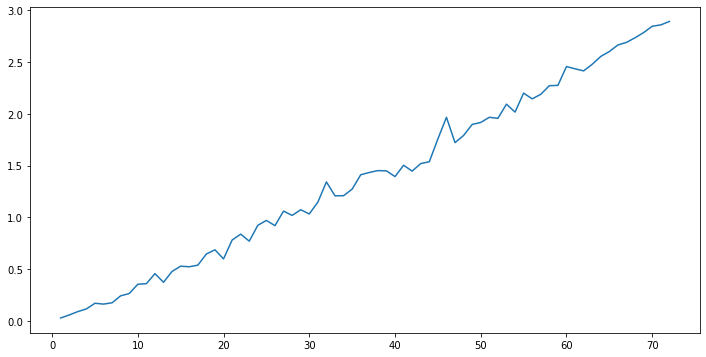

In [19]:
exp_ts=np.exp(norm_ts)
plot(exp_ts)

In [20]:
perform_adf_test(exp_ts)

ADF Statistic : 1.648979
p-value: 0.997997 


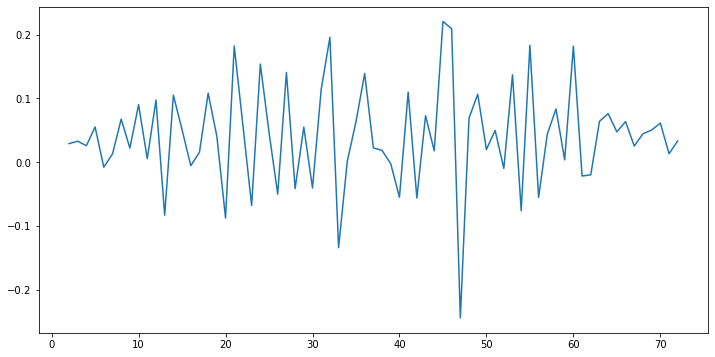

In [21]:
# First Difference
diff_ts=exp_ts.diff().dropna()
plot(diff_ts)

In [22]:
perform_adf_test(diff_ts)

ADF Statistic : -4.881064
p-value: 0.000038 


Fit AR Model

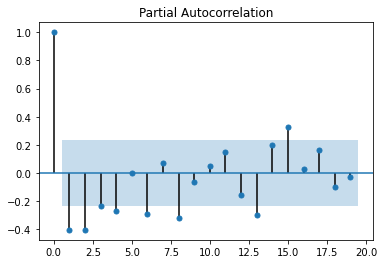

In [24]:
plot_pacf(diff_ts)
plt.show()

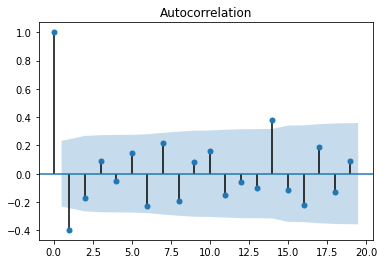

In [25]:
plot_acf(diff_ts)
plt.show()

In [26]:
# creating the model by looking AR order by pacf and MA order by acf
model=ARMA(diff_ts,order=(4,1))

C:\Mba notes\novels\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [27]:
model_fit=model.fit()

In [28]:
# predict out 3 hrs
prediction_info=model_fit.forecast(3)
predictions=prediction_info[0]
lower_bound=prediction_info[2][:,0]
upper_bound=prediction_info[2][:,1]

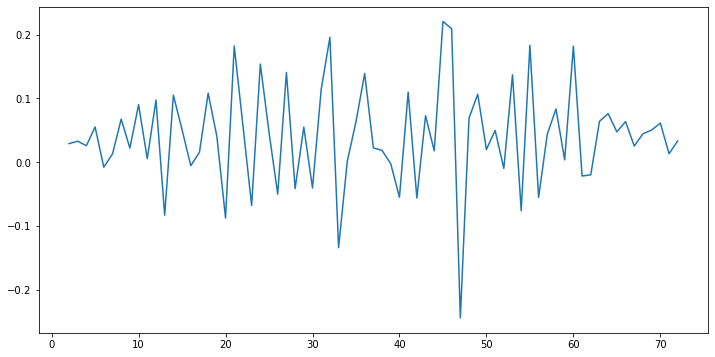

In [30]:
plot(diff_ts)

In [31]:
def undo_transformations(predictions,series,mu,sigma):
    first_pred=sigma*np.log(predictions[0] + np.exp((series.iloc[-1]-mu)/sigma)) + mu
    orig_predictions=[first_pred]
    
    for i in range(len(predictions[1:])):
        next_pred=sigma*np.log(predictions[i+1] + np.exp((orig_predictions[-1]-mu)/sigma)) + mu
        orig_predictions.append(next_pred)
    return np.array(orig_predictions).flatten()

In [34]:
original_preds=undo_transformations(predictions,df,mu,sigma)
orig_lower_bound=undo_transformations(lower_bound,df,mu,sigma)
orig_upper_bound=undo_transformations(upper_bound,df,mu,sigma)   

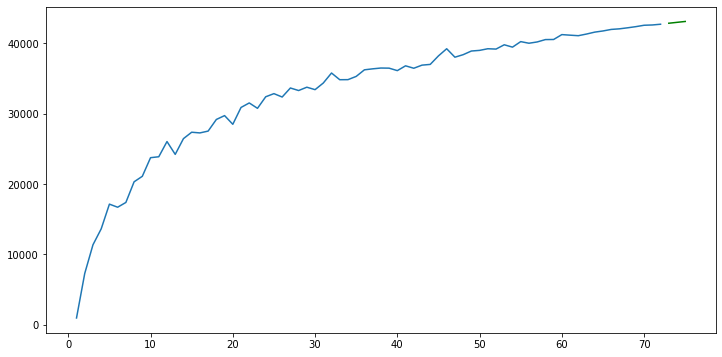

In [44]:
plot(df)
plt.plot(np.arange(len(df)+1,len(df)+4),original_preds,color='g')

### Model Selection in Time Series

In [46]:
def perform_adf_test(series):
    result=adfuller(series)
    print('ADF Statistic %f' % result[0])
    print('p-value : %f' % result[1])

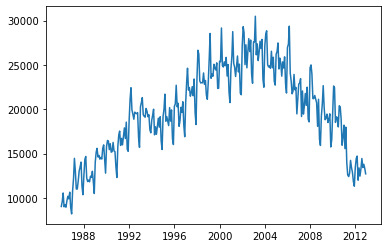

In [58]:
df=pd.read_csv(r'downloads/catfish.csv',parse_dates=[0],index_col=0,squeeze=True)
plt.plot(df)

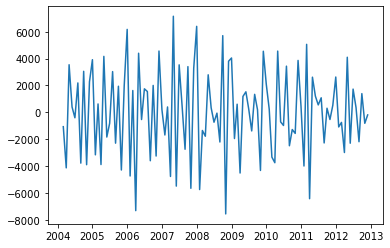

In [59]:
df=df.asfreq(pd.infer_freq(df.index))
df=df.loc[datetime(2004,1,1):]
df=df.diff().diff().dropna()
plt.plot(df)

In [60]:
perform_adf_test(df)

ADF Statistic -7.162321
p-value : 0.000000


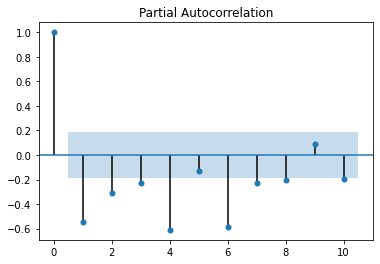

In [62]:
plot_pacf(df,lags=10)
plt.show()

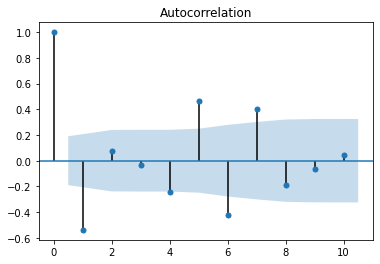

In [63]:
plot_acf(df,lags=10)
plt.show()

Either AR(1),AR(4),AR(6) or AR(10)

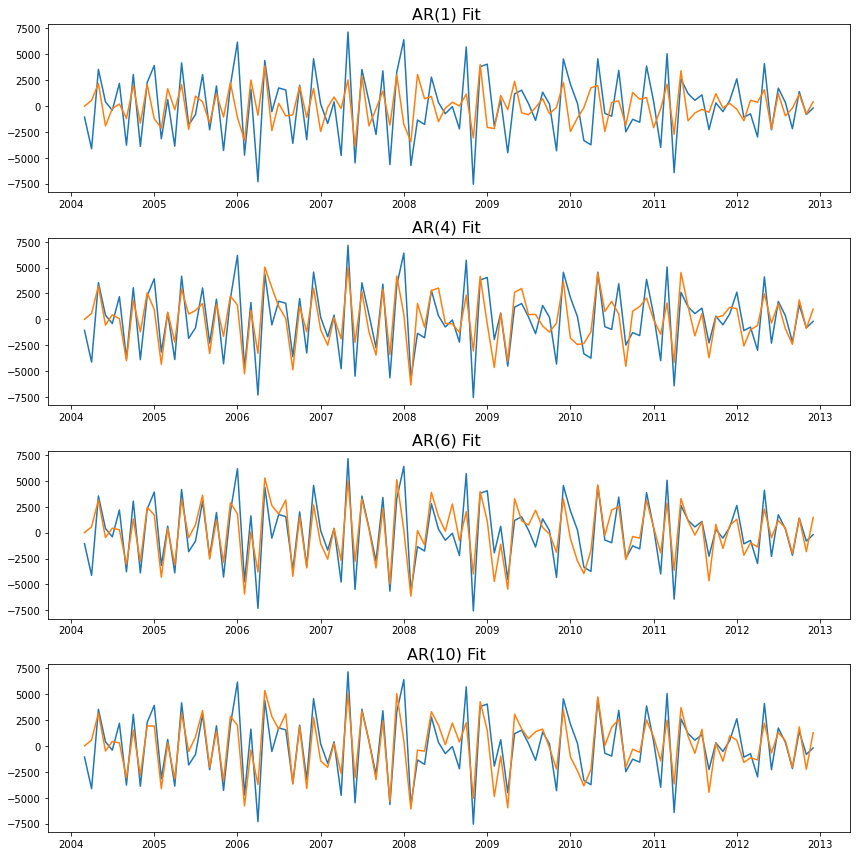

In [67]:
plt.figure(figsize=(12,12))
ar_orders=[1,4,6,10]
fitted_model_dict={}

for idx,ar_order in enumerate(ar_orders):
    ar_model=ARMA(df,order=(ar_order,0))
    ar_model_fit=ar_model.fit()
    fitted_model_dict[ar_order]=ar_model_fit
    plt.subplot(4,1,idx+1)
    plt.plot(df)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit ' % ar_order,fontsize=16)
    
plt.tight_layout()

Each model has

1. a log likelihood(l)

2. number of parameters (k)

3. number of samples used for fitting(n)

<font color='red'>AIC= 2k -2l</font>

<font color='red'>BIC= k ln(n) -2l</font>

In [70]:
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order,fitted_model_dict[ar_order].aic))

AIC for AR(1): 1980.8563112835714
AIC for AR(4): 1927.4507591161603
AIC for AR(6): 1899.6302659555495
AIC for AR(10): 1902.2647912329733


Based on AIC criteria, pick AR(6)

In [73]:
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order,fitted_model_dict[ar_order].bic))

AIC for AR(1): 1988.8466285659076
AIC for AR(4): 1943.4313936808326
AIC for AR(6): 1920.937778708446
AIC for AR(10): 1934.226060362318


Based on BIC criteria ,pick AR(6)

In [80]:
import yfinance as yf
tickerSymbol='MSFT'
tickerData=yf.Ticker(tickerSymbol)
tickerDf=tickerData.history(period='1d',start='2020-1-1',end='2020-3-20')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)